In [78]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
base_url = "https://www.amazon.in/gp/bestsellers/electronics/ref=zg_bs_nav_electronics_0" #url of webpage
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
   } # its an environment of a browser of pass the security

In [79]:
list_pc = []
for page in range (1, 4):
  url = base_url.format(page, page)
  response = requests.get(url, headers=headers)
  soup = BeautifulSoup(response.content, "lxml")
  soup_book = soup.find_all("div", class_="a-column a-span12 a-text-center _cDEzb_grid-column_2hIsc") #class of all the items
  for pc in soup_book :
    if len(list_pc) < 50:
      product = pc.find("div", class_="zg-grid-general-faceout").get_text(strip=True)
      price = pc.find("span", class_="a-size-base a-color-price").get_text(strip=True)
      rating = pc.find("span", class_="a-icon-alt")
     # total_reviews = pc.find("a", class_="a-size-small a-link-normal")
      list_pc.append({
        "Product Name": product,
        "Price" : price,
        "Rating": rating,
       # "TotalReviews" : total_reviews
    })
    else:
      break

In [80]:
df = pd.DataFrame(list_pc)
df.head(25)

,Product Name,Price,Rating
0,boAt BassHeads 100 in-Ear Wired Headphones wit...,₹329.00,[4.1 out of 5 stars]
1,Noise Twist Round dial Smart Watch with Blueto...,"₹1,499.00",[4.1 out of 5 stars]
2,Ambrane Unbreakable 3A Fast Charging 1.5m Brai...,₹149.00,[4.0 out of 5 stars]
3,Noise Pulse Go Buzz Smart Watch with Advanced ...,"₹1,399.00",[4.1 out of 5 stars]
4,Oneplus Bullets Z2 Bluetooth Wireless in Ear E...,"₹1,799.00",[4.1 out of 5 stars]
5,"iQOO Z9 Lite 5G (Aqua Flow, 6GB RAM, 128GB Sto...","₹11,498.00",[4.0 out of 5 stars]
6,"realme NARZO 70 Pro 5G (Glass Green, 8GB RAM,2...","₹18,998.00",[4.1 out of 5 stars]
7,Nokia All-New 105 Single Sim Keypad Phone with...,"₹1,198.00",[4.0 out of 5 stars]
8,realme Buds 2 Wired in Ear Earphones with Mic ...,₹598.00,[4.3 out of 5 stars]
9,OnePlus Nord Buds 2r True Wireless in Ear Earb...,"₹1,999.00",[4.2 out of 5 stars]


In [81]:
df.to_csv("amzn.csv", index=False)

In [84]:
#removing the rs sign and , from the price to further convert it into float
df['Price'] = df['Price'].str.replace('₹', '')
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
print(df['Price'].dtype)


float64


In [85]:
df.head()

,Product Name,Price,Rating
0,boAt BassHeads 100 in-Ear Wired Headphones wit...,329.0,[4.1 out of 5 stars]
1,Noise Twist Round dial Smart Watch with Blueto...,1499.0,[4.1 out of 5 stars]
2,Ambrane Unbreakable 3A Fast Charging 1.5m Brai...,149.0,[4.0 out of 5 stars]
3,Noise Pulse Go Buzz Smart Watch with Advanced ...,1399.0,[4.1 out of 5 stars]
4,Oneplus Bullets Z2 Bluetooth Wireless in Ear E...,1799.0,[4.1 out of 5 stars]


In [86]:
filtered_data = df[df['Price'] <= 1000] #getting the products whose price is less than 1k
filtered_data.head(10)

,Product Name,Price,Rating
0,boAt BassHeads 100 in-Ear Wired Headphones wit...,329.0,[4.1 out of 5 stars]
2,Ambrane Unbreakable 3A Fast Charging 1.5m Brai...,149.0,[4.0 out of 5 stars]
8,realme Buds 2 Wired in Ear Earphones with Mic ...,598.0,[4.3 out of 5 stars]
11,Boult Audio W20 Truly Wireless in Ear Earbuds ...,999.0,[4.1 out of 5 stars]
13,"SanDisk Ultra 64GB microSDXC UHS-I, 140MB/s R,...",520.0,[4.4 out of 5 stars]
15,"JBL C100SI Wired In Ear Headphones with Mic, J...",598.0,[4.1 out of 5 stars]
16,"HP v236w USB 2.0 64GB Pen Drive,4.2 out of 5 s...",359.0,[4.2 out of 5 stars]
20,"ZEBRONICS ZEB-JAGUAR Wireless Mouse, 2.4GHz wi...",299.0,[4.0 out of 5 stars]
24,Portronics iKonnect C Pro Type C to 3.5 mm Aud...,219.0,[4.0 out of 5 stars]
30,boAt BassHeads 100 in-Ear Wired Headphones wit...,329.0,[4.1 out of 5 stars]


In [92]:
#removing extra things from Ratings and convert into float
df['Rating'] = df['Rating'].astype(str).str.replace('<span class="a-icon-alt">', '')
df['Rating'] = df['Rating'].str.replace(' out of 5 stars', '')
df['Rating'] = df['Rating'].str.replace('</span>', '')
df.head()


,Product Name,Price,Rating
0,boAt BassHeads 100 in-Ear Wired Headphones wit...,329.0,4.1
1,Noise Twist Round dial Smart Watch with Blueto...,1499.0,4.1
2,Ambrane Unbreakable 3A Fast Charging 1.5m Brai...,149.0,4.0
3,Noise Pulse Go Buzz Smart Watch with Advanced ...,1399.0,4.1
4,Oneplus Bullets Z2 Bluetooth Wireless in Ear E...,1799.0,4.1


In [94]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [96]:
df.head()

,Product Name,Price,Rating
0,boAt BassHeads 100 in-Ear Wired Headphones wit...,329.0,4.1
1,Noise Twist Round dial Smart Watch with Blueto...,1499.0,4.1
2,Ambrane Unbreakable 3A Fast Charging 1.5m Brai...,149.0,4.0
3,Noise Pulse Go Buzz Smart Watch with Advanced ...,1399.0,4.1
4,Oneplus Bullets Z2 Bluetooth Wireless in Ear E...,1799.0,4.1


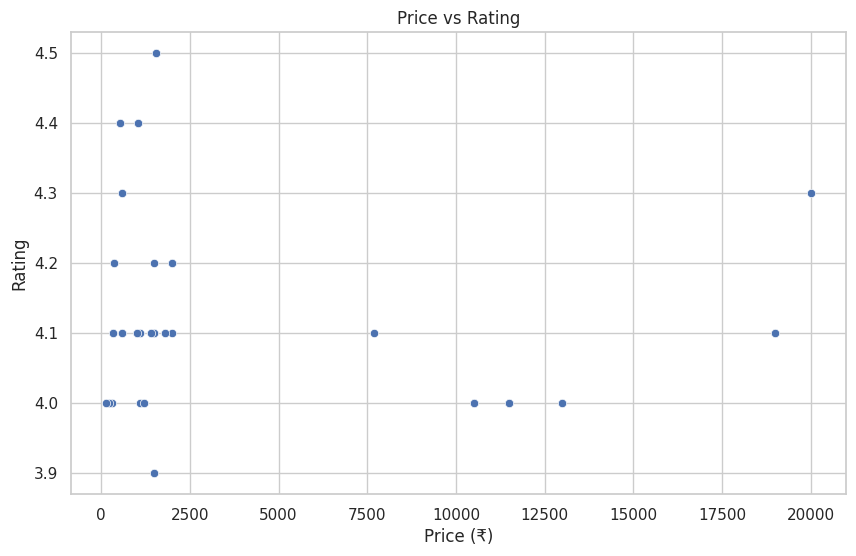

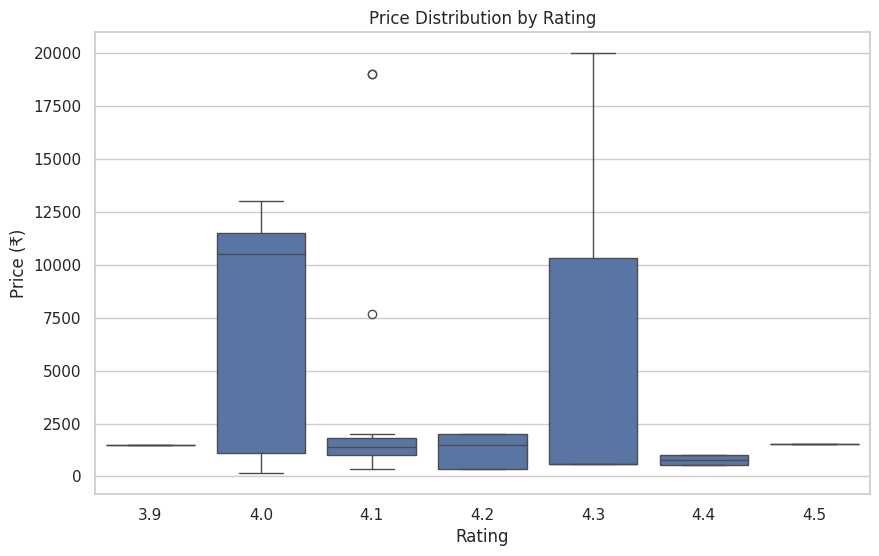

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of price vs rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', data=df)
plt.title('Price vs Rating')
plt.xlabel('Price (₹)')
plt.ylabel('Rating')
plt.show()

# Box plot of prices by rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Price', data=df)
plt.title('Price Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Price (₹)')
plt.show()


In [101]:
df.to_csv("amzn1.csv", index=False)
